<a href="https://colab.research.google.com/github/sergekamanzi/wine_quality/blob/main/red_wine_quality_predictor_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing PANDAS for my dataset**

In [33]:
import pandas as pd

In [76]:
# Load datasets for red and white wines
red = pd.read_csv('/content/winequality-red.csv', sep=';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Statistical Summary and Feature Correlation of Red Wine Data**


Statistical Summary:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000        

<Figure size 1400x1000 with 0 Axes>

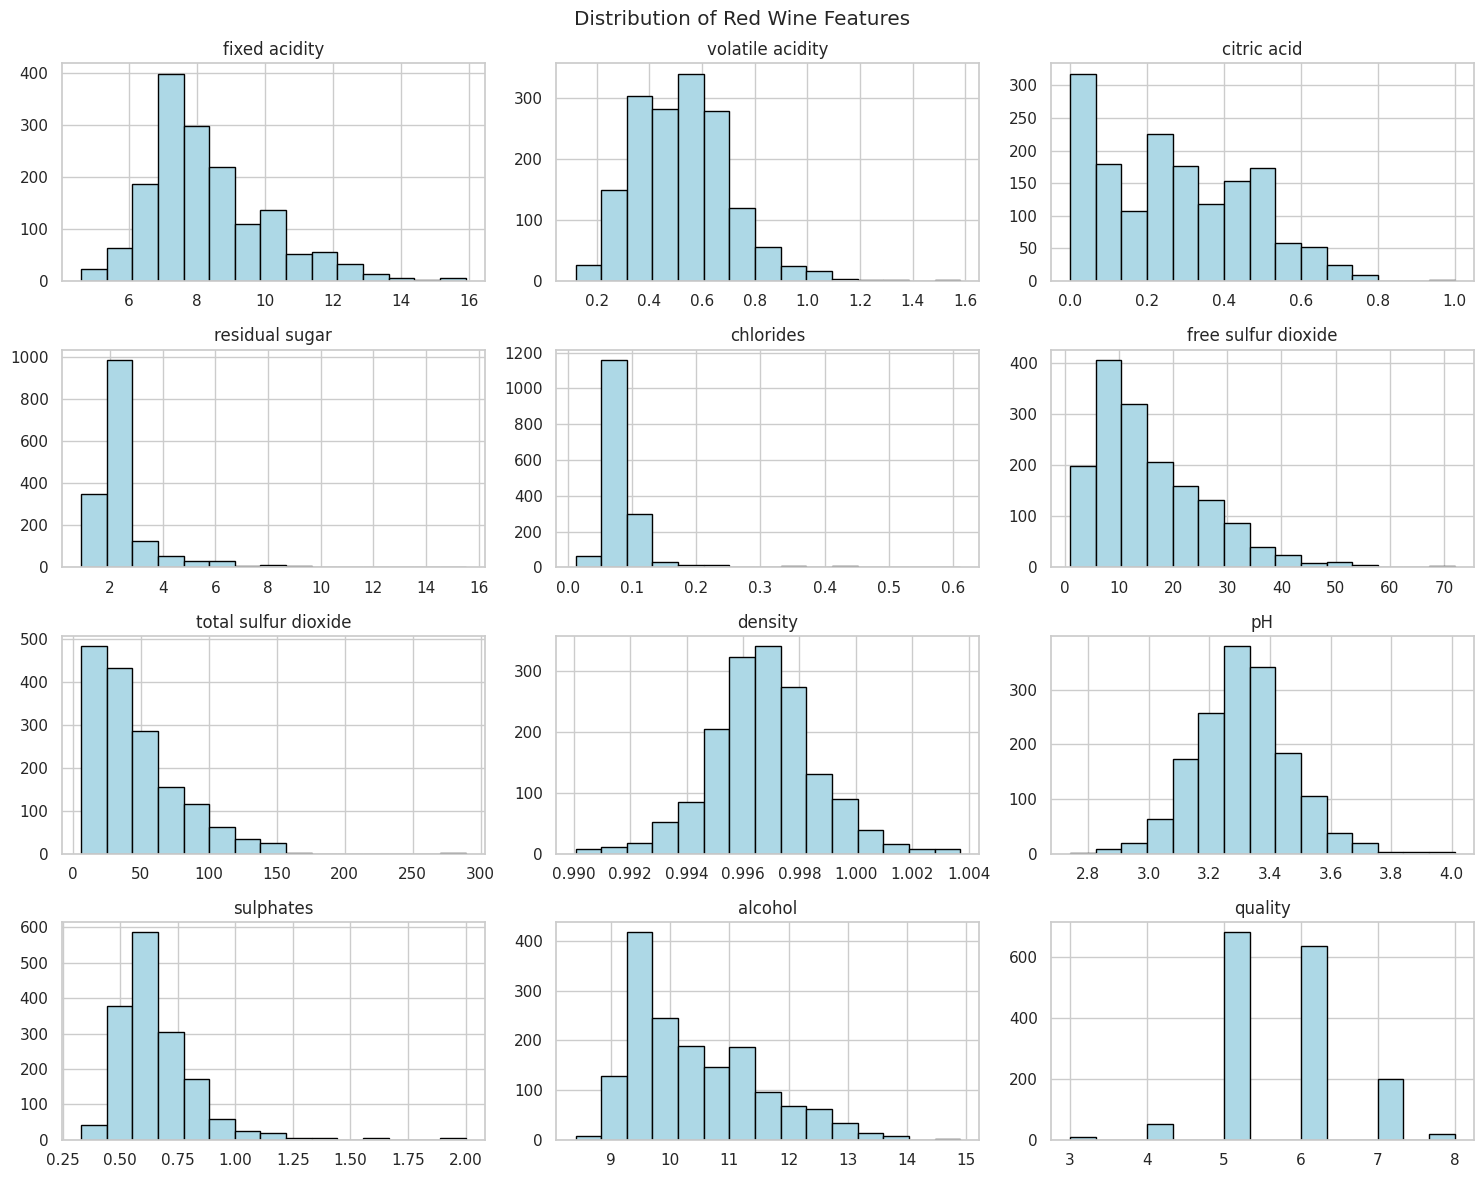

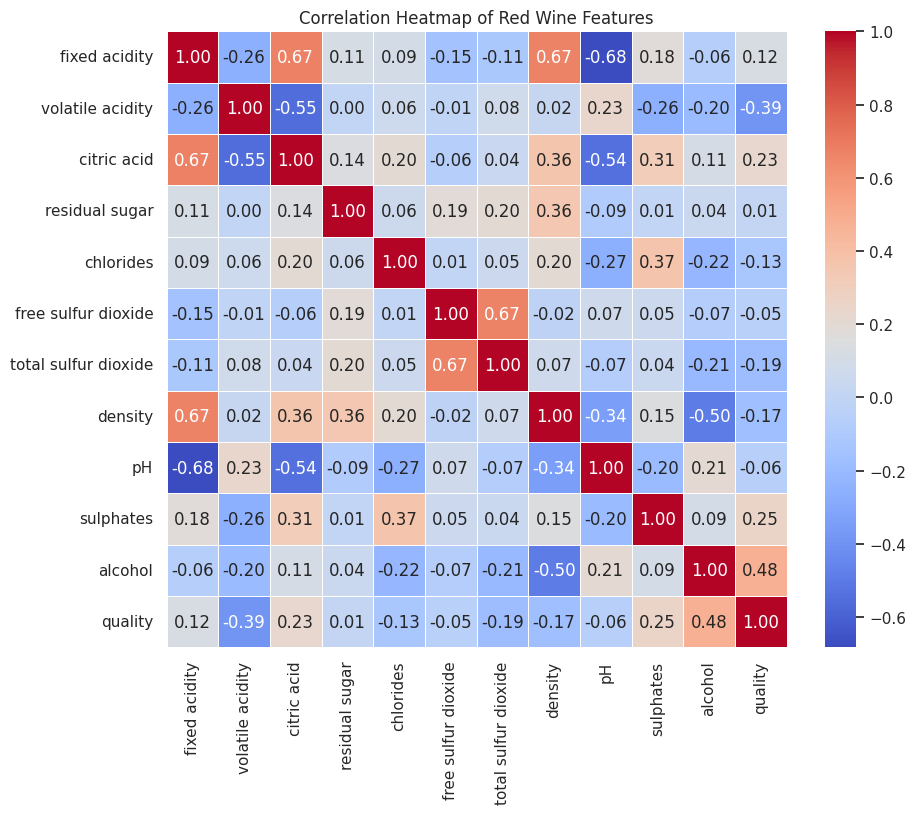

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns


# Simple statistical summary of the data
print("\nStatistical Summary:")
print(red.describe())

# Plotting histograms of all features to analyze the distribution of data
plt.figure(figsize=(14, 10))
red.hist(bins=15, figsize=(15, 12), layout=(4, 3), color='lightblue', edgecolor='black')
plt.suptitle('Distribution of Red Wine Features')
plt.tight_layout()
plt.show()

# Correlation heatmap to see relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(red.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Red Wine Features')
plt.show()


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
X=red.drop('quality', axis=1)
Y=red['quality']

In [55]:
# Check the shape of the NumPy arrays
X.shape,Y.shape

((1599, 11), (1599,))

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

**Linear Regression Model for Predicting Red Wine Quality**

In [57]:
model_fit=LinearRegression()
model_fit.fit(x_train, y_train)

LinearRegression()

In [58]:
y_pred = model_fit.predict(x_test)

In [59]:
print(model_fit.coef_)

[ 2.34704718e-02 -1.09961969e+00 -2.47859776e-01  7.73785620e-03
 -1.67359251e+00  4.55041815e-03 -3.26389168e-03 -1.42395563e+01
 -3.19247444e-01  8.12824701e-01  2.91991158e-01]


In [60]:
print(model_fit.intercept_)

17.962578339232323


In [68]:
# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE of red wine:", rmse)

RMSE of red wine: 0.6412759715991395


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [69]:
# Calculate R-squared score (accuracy)
r2 = r2_score(y_test, y_pred)
print("R-squared (Accuracy) of red wine:", r2)

R-squared (Accuracy) of red wine: 0.3513885332505231


**Predicting Red Wine Quality Using Linear Regression: User-Input Model**

In [80]:
import numpy as np
import warnings
warnings.filterwarnings('ignore', message='X does not have valid feature names')


# Select only the features to be used for training and prediction
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'pH', 'alcohol']

# Define X (features) and Y (target)
X = red[selected_features]
Y = red['quality']

# Function to predict wine quality based on user input
def predict_wine_quality():
    # Get input values from the user
    fixed_acidity = float(input("Enter Fixed Acidity: "))
    volatile_acidity = float(input("Enter Volatile Acidity: "))
    citric_acid = float(input("Enter Citric Acid: "))
    residual_sugar = float(input("Enter Residual Sugar: "))
    ph = float(input("Enter pH level: "))
    alcohol = float(input("Enter Alcohol Content: "))

    # Construct the input array for prediction
    features = np.array([[fixed_acidity, volatile_acidity, citric_acid, residual_sugar, ph, alcohol]])

    # Predict the quality using the trained model
    prediction = model_fit.predict(features)[0]

    # Ensure the predicted quality is within the 0-10 range (round to nearest value)
    predicted_quality = round(np.clip(prediction, 0, 10), 2)

    print(f"Predicted Wine Quality (out of 10): {predicted_quality}")

# Call the function to interact with the user
predict_wine_quality()